## <center> Cargar Librerias

In [1]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import spotipy
import spotipy.util as util

from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth

## <center> Pasarle las credenciales, ID propio y qge nos genere una token para poder accesar al sistema 

In [2]:
CLIENT_ID = "ec6d7d6eea8b43df9dddedbdc01d171c"
CLIENT_SECRET = "98875cccf1974211857973f3e4aa7605"

credentials = SpotifyClientCredentials(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET)

token = credentials.get_access_token()
spotify = spotipy.Spotify(auth=token)

<ipython-input-2-ed01b3203841>:8: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  token = credentials.get_access_token()


## <center> Alternativa para generar una token que ya incluya acceso a una cierta funcionalidad de extraccion de datos  </center>

In [3]:
redirect_uri='https://prueba.com/callback'
#scope="user-library-read, user-modify-playback-state "
scope= 'playlist-modify'
CLIENT_ID = "ec6d7d6eea8b43df9dddedbdc01d171c"
CLIENT_SECRET = "98875cccf1974211857973f3e4aa7605"

## <center> Aqui agarramos con ayuda del scope y de la URI la info de LiliaJunes</center>

In [5]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id= CLIENT_ID,
                                               client_secret=CLIENT_SECRET,
                                               redirect_uri= 'https://prueba.com/callback',
                                               scope=scope))




#token2 = 


playlists = sp.user_playlists('1281498782')
while playlists:
    for i, playlist in enumerate(playlists['items']):
        print("%4d %s %s" % (i + 1 + playlists['offset'], playlist['uri'],  playlist['name']))
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None

#results = sp.current_user_saved_tracks()
#for idx, item in enumerate(results['items']):
#    track = item['track']
#    print(idx, track['artists'][0]['name'], " – ", track['name'])

   1 spotify:playlist:4ksXriDhPdgApOzZNQctat Adolescentes Orquesta — Virgen
   2 spotify:playlist:47uYfTJqYUjggL2OP5GhYS Mis pistas de Shazam
   3 spotify:playlist:72MELer5WCrEFmiSo47Xmp CANCIONES DE AMOR <3
   4 spotify:playlist:37i9dQZF1DWVlTYkqScMID This Is Ricardo Arjona
   5 spotify:playlist:27kNWmnl4NGluD6tlpBSb6 REGGAETON NUEVO 2020 🔥 Lo más nuevo, lo más escuchado
   6 spotify:playlist:6SlblPEqm776yY7NWMYAZk Playlist para humectar la carita con lágrimas.
   7 spotify:playlist:6RWuVPBLIeADuoG89tj5Pm Canciones de amor/Banda
   8 spotify:playlist:2dBmGdIBqGSzn5zI8gMDYV Canciones Tristes. 😪😭💔
   9 spotify:playlist:2uE9rtrBVPYVkSxzHqmKyd Solo A Terceros


# <center> Podemos hacer busquedas acerca de un artista pasando un a token

In [117]:
CLIENT_ID = "ec6d7d6eea8b43df9dddedbdc01d171c"
CLIENT_SECRET = "98875cccf1974211857973f3e4aa7605"

credentials = SpotifyClientCredentials(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET)

token = credentials.get_access_token()
spotify = spotipy.Spotify(auth=token)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  


In [6]:
radiohead = 'spotify:artist:4Z8W4fKeB5YxbusRsdQVPb'

In [7]:
results = spotify.artist_top_tracks(radiohead)

In [8]:
results.keys()

dict_keys(['tracks'])

In [9]:
z=results['tracks']

In [10]:
z[:10]

[{'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4Z8W4fKeB5YxbusRsdQVPb'},
     'href': 'https://api.spotify.com/v1/artists/4Z8W4fKeB5YxbusRsdQVPb',
     'id': '4Z8W4fKeB5YxbusRsdQVPb',
     'name': 'Radiohead',
     'type': 'artist',
     'uri': 'spotify:artist:4Z8W4fKeB5YxbusRsdQVPb'}],
   'external_urls': {'spotify': 'https://open.spotify.com/album/3gBVdu4a1MMJVMy6vwPEb8'},
   'href': 'https://api.spotify.com/v1/albums/3gBVdu4a1MMJVMy6vwPEb8',
   'id': '3gBVdu4a1MMJVMy6vwPEb8',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/ab67616d0000b273df55e326ed144ab4f5cecf95',
     'width': 640},
    {'height': 300,
     'url': 'https://i.scdn.co/image/ab67616d00001e02df55e326ed144ab4f5cecf95',
     'width': 300},
    {'height': 64,
     'url': 'https://i.scdn.co/image/ab67616d00004851df55e326ed144ab4f5cecf95',
     'width': 64}],
   'name': 'Pablo Honey',
   'release_date': '1993-02-22',
   'release_date_preci

In [11]:
for track in results['tracks'][:10]:
    try:
        print('track    : ' + track['name'])
        print('audio    : ' + track['preview_url'])
        print('cover art: ' + track['album']['images'][0]['url'])
        print()
    except TypeError:
        print("Chinga tu madre Chucho")

track    : Creep
audio    : https://p.scdn.co/mp3-preview/c82f6b69411ca73eba8f401621d8ead3c4dfa9da?cid=ec6d7d6eea8b43df9dddedbdc01d171c
cover art: https://i.scdn.co/image/ab67616d0000b273df55e326ed144ab4f5cecf95

track    : Karma Police
audio    : https://p.scdn.co/mp3-preview/2079205a3d8a4d87d504512c5b4019a6a2d29761?cid=ec6d7d6eea8b43df9dddedbdc01d171c
cover art: https://i.scdn.co/image/ab67616d0000b273c8b444df094279e70d0ed856

track    : High and Dry
audio    : https://p.scdn.co/mp3-preview/74390a54d38cd1204edb0a6cde829b591782cc0c?cid=ec6d7d6eea8b43df9dddedbdc01d171c
cover art: https://i.scdn.co/image/ab67616d0000b2739293c743fa542094336c5e12

track    : No Surprises
audio    : https://p.scdn.co/mp3-preview/478f760b7f810d8cd8cfd990083a0000808ab25c?cid=ec6d7d6eea8b43df9dddedbdc01d171c
cover art: https://i.scdn.co/image/ab67616d0000b273c8b444df094279e70d0ed856

track    : Fake Plastic Trees
audio    : https://p.scdn.co/mp3-preview/193c6241d6ec56bd34628b5f509a50783f2996d8?cid=ec6d7d6eea8

In [12]:
market = [ "AD", "AR", "AT", "AU", "BE", "BG", "BO", "BR", "CA", "CH", "CL", "CO", "CR", "CY", 
      "CZ", "DE", "DK", "DO", "EC", "EE", "ES", "FI", "FR", "GB", "GR", "GT", "HK", "HN", "HU", 
      "ID", "IE", "IS", "IT", "JP", "LI", "LT", "LU", "LV", "MC", "MT", "MX", "MY", "NI", "NL", 
      "NO", "NZ", "PA", "PE", "PH", "PL", "PT", "PY", "SE", "SG", "SK", "SV", "TH", "TR", "TW", 
      "US", "UY", "VN" ]

In [13]:
track = "radiohead no surprises"
res = spotify.search(track, type="track", market=market, limit=1)
print(res)

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=radiohead+no+surprises&type=track&market=AD&offset=0&limit=1', 'items': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4Z8W4fKeB5YxbusRsdQVPb'}, 'href': 'https://api.spotify.com/v1/artists/4Z8W4fKeB5YxbusRsdQVPb', 'id': '4Z8W4fKeB5YxbusRsdQVPb', 'name': 'Radiohead', 'type': 'artist', 'uri': 'spotify:artist:4Z8W4fKeB5YxbusRsdQVPb'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/6dVIqQ8qmQ5GBnJ9shOYGE'}, 'href': 'https://api.spotify.com/v1/albums/6dVIqQ8qmQ5GBnJ9shOYGE', 'id': '6dVIqQ8qmQ5GBnJ9shOYGE', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b273c8b444df094279e70d0ed856', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e02c8b444df094279e70d0ed856', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d00004851c8b444df094279e70d0ed856', 'width': 64}], 'name': 'OK Computer', 're

In [14]:
type(res)

dict

In [15]:
pd.DataFrame.from_dict(res, orient='index')['items']

tracks    [{'album': {'album_type': 'album', 'artists': ...
Name: items, dtype: object

In [16]:
(res['tracks'])

{'href': 'https://api.spotify.com/v1/search?query=radiohead+no+surprises&type=track&market=AD&offset=0&limit=1',
 'items': [{'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4Z8W4fKeB5YxbusRsdQVPb'},
      'href': 'https://api.spotify.com/v1/artists/4Z8W4fKeB5YxbusRsdQVPb',
      'id': '4Z8W4fKeB5YxbusRsdQVPb',
      'name': 'Radiohead',
      'type': 'artist',
      'uri': 'spotify:artist:4Z8W4fKeB5YxbusRsdQVPb'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/6dVIqQ8qmQ5GBnJ9shOYGE'},
    'href': 'https://api.spotify.com/v1/albums/6dVIqQ8qmQ5GBnJ9shOYGE',
    'id': '6dVIqQ8qmQ5GBnJ9shOYGE',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b273c8b444df094279e70d0ed856',
      'width': 640},
     {'height': 300,
      'url': 'https://i.scdn.co/image/ab67616d00001e02c8b444df094279e70d0ed856',
      'width': 300},
     {'height': 64,
      'url': 'https://i.scdn.co/image/ab67

In [17]:
res['tracks']

{'href': 'https://api.spotify.com/v1/search?query=radiohead+no+surprises&type=track&market=AD&offset=0&limit=1',
 'items': [{'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4Z8W4fKeB5YxbusRsdQVPb'},
      'href': 'https://api.spotify.com/v1/artists/4Z8W4fKeB5YxbusRsdQVPb',
      'id': '4Z8W4fKeB5YxbusRsdQVPb',
      'name': 'Radiohead',
      'type': 'artist',
      'uri': 'spotify:artist:4Z8W4fKeB5YxbusRsdQVPb'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/6dVIqQ8qmQ5GBnJ9shOYGE'},
    'href': 'https://api.spotify.com/v1/albums/6dVIqQ8qmQ5GBnJ9shOYGE',
    'id': '6dVIqQ8qmQ5GBnJ9shOYGE',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b273c8b444df094279e70d0ed856',
      'width': 640},
     {'height': 300,
      'url': 'https://i.scdn.co/image/ab67616d00001e02c8b444df094279e70d0ed856',
      'width': 300},
     {'height': 64,
      'url': 'https://i.scdn.co/image/ab67

In [18]:
for track in (res['tracks']['items']):
    print(track['name'])
    print('audio    : ' + track['preview_url'])

No Surprises
audio    : https://p.scdn.co/mp3-preview/478f760b7f810d8cd8cfd990083a0000808ab25c?cid=ec6d7d6eea8b43df9dddedbdc01d171c


In [19]:
a['items']

NameError: name 'a' is not defined

In [20]:
b =a['items']

NameError: name 'a' is not defined

In [76]:
b['list']

TypeError: list indices must be integers or slices, not str

In [21]:
results = spotify.search(q='Micheal Jackson', limit=20)
for idx, track in enumerate(results['tracks']['items']):
    print(idx, track['name'])

0 Billie Jean
1 Mind Is The Magic - Anthem For The Las Vegas Show
2 Beat It
3 Micheal Jackson
4 Rock with You - Single Version
5 Micheal Jackson (Michael Jackson Droptop)
6 Smooth Criminal - 2012 Remaster
7 Micheal Jackson Flow
8 Don't Stop 'Til You Get Enough
9 Micheal Jackson
10 P.Y.T. (Pretty Young Thing)
11 Micheal Jackson
12 Don’t Matter To Me (with Michael Jackson)
13 Bad (Micheal Jackson)
14 The Way You Make Me Feel - 2012 Remaster
15 Bille Jean (8-Bit Micheal Jackson Emulation)
16 Remember the Time
17 The Future
18 Bad - 2012 Remaster
19 Micheal Jackson


## <center> Analisis de Radiohead </center>

In [22]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
cid = 'ec6d7d6eea8b43df9dddedbdc01d171c'
secret = '98875cccf1974211857973f3e4aa7605'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [23]:
token = credentials.get_access_token()
spotify = spotipy.Spotify(auth=token)

<ipython-input-23-7c9c621deaf0>:1: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  token = credentials.get_access_token()


In [24]:
CLIENT_ID = "ec6d7d6eea8b43df9dddedbdc01d171c"
CLIENT_SECRET = "98875cccf1974211857973f3e4aa7605"

credentials = SpotifyClientCredentials(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET)

token = credentials.get_access_token()
spotify = spotipy.Spotify(auth=token)

<ipython-input-24-ed01b3203841>:8: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  token = credentials.get_access_token()


In [25]:
name = "{Radiohead}" #chosen artist
result = spotify.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/4Z8W4fKeB5YxbusRsdQVPb'},
  'href': 'https://api.spotify.com/v1/artists/4Z8W4fKeB5YxbusRsdQVPb',
  'id': '4Z8W4fKeB5YxbusRsdQVPb',
  'name': 'Radiohead',
  'type': 'artist',
  'uri': 'spotify:artist:4Z8W4fKeB5YxbusRsdQVPb'}]

In [26]:
#Sacar las URIS directamente
artist_uri = result['tracks']['items'][0]['artists'][0]['uri']
#Sacar todos los albumes con las URIS
sp_albums = spotify.artist_albums(artist_uri, album_type='album')
#Guardar por separadas las canciones
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])
    
album_names
album_uris
#Keep names an

['spotify:album:0tzfI6NFJqcJkWb23R3lRZ',
 'spotify:album:2ix8vWvvSp2Yo7rKMiWpkg',
 'spotify:album:566osTxDsfrtdBxPDMGufx',
 'spotify:album:3P17levwUPzmFfLYdAK3A7',
 'spotify:album:5vkqYmiPBYLaalcmjujWxK',
 'spotify:album:6zTAW5oRuOmxJuUHhcQope',
 'spotify:album:5mzoI3VH0ZWk1pLFR6RoYy',
 'spotify:album:1vdQ5t7iO2gC3OX7j2GFCt',
 'spotify:album:1HrMmB5useeZ0F5lHrMvl0',
 'spotify:album:6GjwtEZcfenmOf6l18N7T7',
 'spotify:album:6dVIqQ8qmQ5GBnJ9shOYGE',
 'spotify:album:35UJLpClj5EDrhpNIi4DFg',
 'spotify:album:3gBVdu4a1MMJVMy6vwPEb8']

In [27]:
def albumSongs(uri):
    album = uri #assign album uri to a_name
    spotify_albums[album] = {} #Creates dictionary for that specific album
#Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = spotify.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
        spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [28]:
spotify_albums = {}
album_count = 0
for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album OK Computer OKNOTOK 1997 2017 songs has been added to spotify_albums dictionary
Album A Moon Shaped Pool songs has been added to spotify_albums dictionary
Album TKOL RMX 1234567 songs has been added to spotify_albums dictionary
Album The King Of Limbs songs has been added to spotify_albums dictionary
Album In Rainbows songs has been added to spotify_albums dictionary
Album In Rainbows (Disk 2) songs has been added to spotify_albums dictionary
Album Hail To the Thief songs has been added to spotify_albums dictionary
Album I Might Be Wrong songs has been added to spotify_albums dictionary
Album Amnesiac songs has been added to spotify_albums dictionary
Album Kid A songs has been added to spotify_albums dictionary
Album OK Computer songs has been added to spotify_albums dictionary
Album The Bends songs has been added to spotify_albums dictionary
Album Pablo Honey songs has been added to spotify_albums dictionary


In [137]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [138]:
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 16.757013082504272 seconds
10 playlists completed
Loop #: 10
Elapsed Time: 31.164382219314575 seconds


In [139]:
spotify_albums

{'spotify:album:0tzfI6NFJqcJkWb23R3lRZ': {'album': ['OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017'],
  'track_number': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   1,
   2,
   3,
   4,
   5,
 

In [142]:
spotify_albums

{'spotify:album:0tzfI6NFJqcJkWb23R3lRZ': {'album': ['OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017',
   'OK Computer OKNOTOK 1997 2017'],
  'track_number': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   1,
   2,
   3,
   4,
   5,
 

In [144]:
In_rainbows =spotify_albums['spotify:album:5vkqYmiPBYLaalcmjujWxK']
In_rainbows

{'album': ['In Rainbows',
  'In Rainbows',
  'In Rainbows',
  'In Rainbows',
  'In Rainbows',
  'In Rainbows',
  'In Rainbows',
  'In Rainbows',
  'In Rainbows',
  'In Rainbows'],
 'track_number': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'id': ['4oXg7xT4ksBxHTx8PcmSXw',
  '4pWIwnnqx8k01fuF95UMIg',
  '35YyxFpE0ZTOoqFx5bADW8',
  '4wajJ1o7jWIg62YqpkHC7S',
  '5Qv2Nby1xTr9pQyjkrc94J',
  '15irEKZ9D6FQqLoZ1qJ1Cx',
  '02ppMPbg1OtEdHgoPqoqju',
  '48X4D1FYOShPz2VF3YdfCF',
  '0YJ9FWWHn9EfnN0lHwbzvV',
  '4T1iiabe7G0UjWQJCY6NE2'],
 'name': ['15 Step',
  'Bodysnatchers',
  'Nude',
  'Weird Fishes/ Arpeggi',
  'All I Need',
  'Faust Arp',
  'Reckoner',
  'House Of Cards',
  'Jigsaw Falling Into Place',
  'Videotape'],
 'uri': ['spotify:track:4oXg7xT4ksBxHTx8PcmSXw',
  'spotify:track:4pWIwnnqx8k01fuF95UMIg',
  'spotify:track:35YyxFpE0ZTOoqFx5bADW8',
  'spotify:track:4wajJ1o7jWIg62YqpkHC7S',
  'spotify:track:5Qv2Nby1xTr9pQyjkrc94J',
  'spotify:track:15irEKZ9D6FQqLoZ1qJ1Cx',
  'spotify:track:02ppMPbg1OtEdHgoPq

In [145]:
import pandas as pd 

In [146]:
In_rainbows = pd.DataFrame.from_dict(In_rainbows)

In [147]:
Ok_computer = spotify_albums['spotify:album:6dVIqQ8qmQ5GBnJ9shOYGE']

In [152]:
Ok_computer = pd.DataFrame.from_dict(Ok_computer)

In [149]:
In_rainbows

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,In Rainbows,1,4oXg7xT4ksBxHTx8PcmSXw,15 Step,spotify:track:4oXg7xT4ksBxHTx8PcmSXw,0.04770,0.598,0.854,0.33800,0.0934,-7.584,0.0422,94.458,0.8440,50
1,In Rainbows,2,4pWIwnnqx8k01fuF95UMIg,Bodysnatchers,spotify:track:4pWIwnnqx8k01fuF95UMIg,0.00443,0.342,0.976,0.01750,0.0974,-4.986,0.0573,166.663,0.7330,48
2,In Rainbows,3,35YyxFpE0ZTOoqFx5bADW8,Nude,spotify:track:35YyxFpE0ZTOoqFx5bADW8,0.83200,0.516,0.342,0.57900,0.0857,-9.785,0.0342,128.378,0.1670,54
3,In Rainbows,4,4wajJ1o7jWIg62YqpkHC7S,Weird Fishes/ Arpeggi,spotify:track:4wajJ1o7jWIg62YqpkHC7S,0.77200,0.531,0.610,0.75600,0.0908,-8.025,0.0387,152.958,0.1990,55
4,In Rainbows,5,5Qv2Nby1xTr9pQyjkrc94J,All I Need,spotify:track:5Qv2Nby1xTr9pQyjkrc94J,0.53100,0.670,0.478,0.42800,0.1380,-8.689,0.0355,88.014,0.0997,51
5,In Rainbows,6,15irEKZ9D6FQqLoZ1qJ1Cx,Faust Arp,spotify:track:15irEKZ9D6FQqLoZ1qJ1Cx,0.84000,0.337,0.288,0.19900,0.0964,-13.477,0.0321,105.036,0.2250,45
6,In Rainbows,7,02ppMPbg1OtEdHgoPqoqju,Reckoner,spotify:track:02ppMPbg1OtEdHgoPqoqju,0.51100,0.523,0.656,0.16000,0.0679,-7.441,0.0262,104.271,0.2140,51
7,In Rainbows,8,48X4D1FYOShPz2VF3YdfCF,House Of Cards,spotify:track:48X4D1FYOShPz2VF3YdfCF,0.26900,0.708,0.499,0.57000,0.1010,-9.644,0.0297,111.652,0.6280,51
8,In Rainbows,9,0YJ9FWWHn9EfnN0lHwbzvV,Jigsaw Falling Into Place,spotify:track:0YJ9FWWHn9EfnN0lHwbzvV,0.10800,0.462,0.832,0.00416,0.0741,-6.085,0.0479,165.653,0.8070,52
9,In Rainbows,10,4T1iiabe7G0UjWQJCY6NE2,Videotape,spotify:track:4T1iiabe7G0UjWQJCY6NE2,0.69400,0.596,0.383,0.80800,0.0889,-11.194,0.0324,77.423,0.0506,46


In [153]:
albums = [Ok_computer, In_rainbows]

In [154]:
pd.concat(albums)

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,OK Computer,1,7c378mlmubSu7NGkLFa4sN,Airbag,spotify:track:7c378mlmubSu7NGkLFa4sN,0.007860,0.305,0.872,0.800000,0.2610,-7.313,0.0503,167.959,0.6480,47
1,OK Computer,2,6LgJvl0Xdtc73RJ1mmpotq,Paranoid Android,spotify:track:6LgJvl0Xdtc73RJ1mmpotq,0.037700,0.251,0.848,0.005910,0.0545,-6.501,0.0579,163.709,0.2070,55
2,OK Computer,3,2CVV8PtUYYsux8XOzWkCP0,Subterranean Homesick Alien,spotify:track:2CVV8PtUYYsux8XOzWkCP0,0.048400,0.312,0.595,0.001390,0.1030,-8.919,0.0298,150.502,0.3370,47
3,OK Computer,4,0z1o5L7HJx562xZSATcIpY,Exit Music (For A Film),spotify:track:0z1o5L7HJx562xZSATcIpY,0.224000,0.293,0.276,0.122000,0.1670,-11.357,0.0349,121.603,0.1950,55
4,OK Computer,5,2fuYa3Lx06QQJAm0MjztKr,Let Down,spotify:track:2fuYa3Lx06QQJAm0MjztKr,0.000121,0.351,0.676,0.113000,0.1800,-9.017,0.0313,102.460,0.1430,49
5,OK Computer,6,63OQupATfueTdZMWTxW03A,Karma Police,spotify:track:63OQupATfueTdZMWTxW03A,0.063800,0.360,0.501,0.000093,0.1720,-9.129,0.0258,74.807,0.3240,62
6,OK Computer,7,6wnmRxEbwUK7WLyUtiRuT7,Fitter Happier,spotify:track:6wnmRxEbwUK7WLyUtiRuT7,0.813000,0.432,0.391,0.003630,0.1550,-14.990,0.2420,123.538,0.7440,41
7,OK Computer,8,0gTRROuntlrPQ64W3J2Etv,Electioneering,spotify:track:0gTRROuntlrPQ64W3J2Etv,0.002670,0.201,0.888,0.098100,0.2910,-5.491,0.0707,78.977,0.3290,43
8,OK Computer,9,2PDQReEXBViVwkrbQ34vd7,Climbing Up the Walls,spotify:track:2PDQReEXBViVwkrbQ34vd7,0.097900,0.243,0.656,0.141000,0.1950,-7.475,0.0410,77.712,0.2210,44
9,OK Computer,10,10nyNJ6zNy2YVYLrcwLccB,No Surprises,spotify:track:10nyNJ6zNy2YVYLrcwLccB,0.057700,0.255,0.393,0.003610,0.1130,-10.654,0.0278,76.426,0.1180,60


In [155]:
#Continuara....

## <center> Analisis mamador </center>

In [29]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import spotipy
import spotipy.util as util

from spotipy.oauth2 import SpotifyClientCredentials

In [30]:
cid = 'ec6d7d6eea8b43df9dddedbdc01d171c'
secret = '98875cccf1974211857973f3e4aa7605'
redirect_uri='https://prueba.com/callback'
username = '21pcavncrxznvbn7clgvpk3sa'

In [31]:
scope = 'user-top-read'
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

In [32]:
# Fetch the top-50 songs of the user
if token:
    sp = spotipy.Spotify(auth=token)
    results = sp.current_user_top_tracks(limit=50,offset=0,time_range='medium_term')
    for song in range(50):
        list = []
        list.append(results)
        with open('top50_data.json', 'w', encoding='utf-8') as f:
            json.dump(list, f, ensure_ascii=False, indent=4)
else:
    print("Can't get token for", username)

In [33]:
with open('top50_data.json') as f:
    data = json.load(f)

In [34]:
len(data[0]['items'])

50

In [35]:
list_of_results = data[0]["items"]
list_of_artist_names = []
list_of_artist_uri = []
list_of_song_names = []
list_of_song_uri = []
list_of_durations_ms = []
list_of_explicit = []
list_of_albums = []
list_of_popularity = []

for result in list_of_results:
    result["album"]
    this_artists_name = result["artists"][0]["name"]
    list_of_artist_names.append(this_artists_name)
    this_artists_uri = result["artists"][0]["uri"]
    list_of_artist_uri.append(this_artists_uri)
    list_of_songs = result["name"]
    list_of_song_names.append(list_of_songs)
    song_uri = result["uri"]
    list_of_song_uri.append(song_uri)
    list_of_duration = result["duration_ms"]
    list_of_durations_ms.append(list_of_duration)
    song_explicit = result["explicit"]
    list_of_explicit.append(song_explicit)
    this_album = result["album"]["name"]
    list_of_albums.append(this_album)
    song_popularity = result["popularity"]
    list_of_popularity.append(song_popularity)

In [36]:
# Convert the pulled content to a pandas df
all_songs = pd.DataFrame(
    {'artist': list_of_artist_names,
     'artist_uri': list_of_artist_uri,
     'song': list_of_song_names,
     'song_uri': list_of_song_uri,
     'duration_ms': list_of_durations_ms,
     'explicit': list_of_explicit,
     'album': list_of_albums,
     'popularity': list_of_popularity
     
    })

In [37]:
all_songs.sort_values('popularity', ascending=False)


,artist,artist_uri,song,song_uri,duration_ms,explicit,album,popularity
43,Coldplay,spotify:artist:4gzpq5DPGxSnKTe4SA8HAU,Yellow,spotify:track:3AJwUDP919kvQ9QcozQPxg,266773,False,Parachutes,84
17,Foster The People,spotify:artist:7gP3bB2nilZXLfPHJhMdvc,Pumped Up Kicks,spotify:track:7w87IxuO7BDcJ3YUqCyMTT,239600,False,Torches,83
29,DJ Snake,spotify:artist:540vIaP2JwjQb9dm3aArA4,Let Me Love You,spotify:track:0lYBSQXN6rCTvUZvg9S0lU,205946,False,Encore,80
9,The Beatles,spotify:artist:3WrFJ7ztbogyGnTHbHJFl2,Yesterday - Remastered 2009,spotify:track:3BQHpFgAp4l80e1XslIjNI,125666,False,Help! (Remastered),75
46,Muse,spotify:artist:12Chz98pHFMPJEknJQMWvI,Supermassive Black Hole,spotify:track:3lPr8ghNDBLc2uZovNyLs9,212439,False,Black Holes and Revelations,73
6,Ed Sheeran,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V,Shape of You,spotify:track:0FE9t6xYkqWXU2ahLh6D8X,233712,False,Shape of You,71
44,Eric Clapton,spotify:artist:6PAt558ZEZl0DmdXlnjMgD,"Layla - Acoustic; Live at MTV Unplugged, Bray ...",spotify:track:3BEZCNZSmVv30vsMNSOCri,289026,False,Unplugged (Deluxe Edition),69
3,Ed Sheeran,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V,What Do I Know?,spotify:track:2pJZ1v8HezrAoZ0Fhzby92,237333,False,Ã· (Deluxe),69
49,The Cure,spotify:artist:7bu3H8JO7d0UbMoVzbo70s,Just Like Heaven,spotify:track:4NnWuGQujzWUEg0uZokO5M,212013,False,"Kiss Me, Kiss Me, Kiss Me",69
30,Cigarettes After Sex,spotify:artist:1QAJqy2dA3ihHBFIHRphZj,K.,spotify:track:1FWsomP9StpCcXNWmJk8Cl,320030,False,Cigarettes After Sex,68


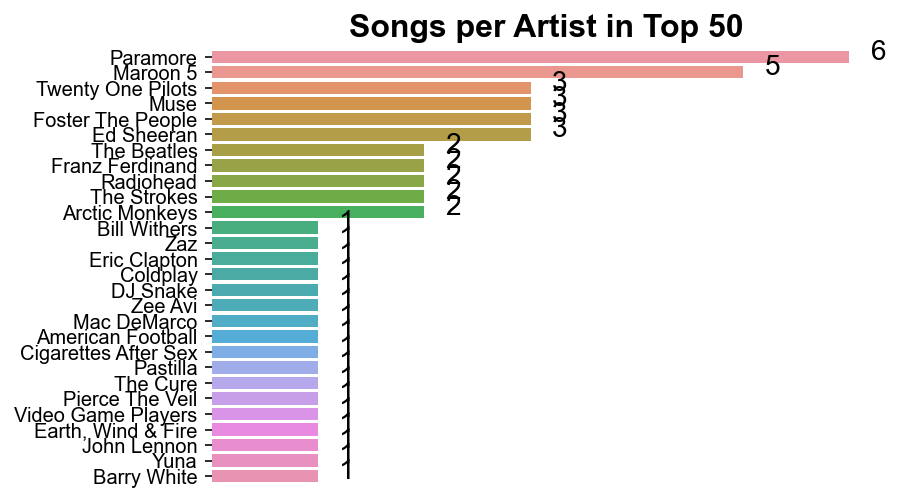

In [38]:
descending_order = all_songs['artist'].value_counts().sort_values(ascending=False).index
ax = sns.countplot(y = all_songs['artist'], order=descending_order)

sns.despine(fig=None, ax=None, top=True, right=True, left=False, trim=False)
sns.set(rc={'figure.figsize':(14,17)})

ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title('Songs per Artist in Top 50', fontsize=16, fontweight='heavy')
sns.set(font_scale = 1.4)
ax.axes.get_xaxis().set_visible(False)
ax.set_frame_on(False)

y = all_songs['artist'].value_counts()
for i, v in enumerate(y):
    ax.text(v + 0.2, i + .16, str(v), color='black', fontweight='light', fontsize=14)
    
plt.show()

In [39]:
#Noemi 
username = "1281498782"

In [40]:

# Fetch the user's playlists
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

playlists = sp.user_playlists("21pcavncrxznvbn7clgvpk3sa")
for playlist in playlists['items']:
    print('Name: {}, Playlist ID: {}, No Tracks: {}'.
          format(playlist['name'], playlist['id'], playlist['tracks']['total']))

In [41]:

def fetch_playlists(sp, username):
    """
    Returns the user's playlists.
    """
        
    id = []
    name = []
    num_tracks = []
    
    # Make the API request
    playlists = sp.user_playlists(username)
    for playlist in playlists['items']:
        id.append(playlist['id'])
        name.append(playlist['name'])
        num_tracks.append(playlist['tracks']['total'])

    # Create the final df   
    df_playlists = pd.DataFrame({"id":id, "name": name, "#tracks": num_tracks})
    return df_playlists

In [42]:
fetch_playlists(sp,username)


,id,name,#tracks
0,4ksXriDhPdgApOzZNQctat,Adolescentes Orquesta — Virgen,70
1,47uYfTJqYUjggL2OP5GhYS,Mis pistas de Shazam,64
2,72MELer5WCrEFmiSo47Xmp,CANCIONES DE AMOR <3,70
3,37i9dQZF1DWVlTYkqScMID,This Is Ricardo Arjona,79
4,27kNWmnl4NGluD6tlpBSb6,"REGGAETON NUEVO 2020 🔥 Lo más nuevo, lo más es...",100
5,6SlblPEqm776yY7NWMYAZk,Playlist para humectar la carita con lágrimas.,372
6,6RWuVPBLIeADuoG89tj5Pm,Canciones de amor/Banda,167
7,2dBmGdIBqGSzn5zI8gMDYV,Canciones Tristes. 😪😭💔,464
8,2uE9rtrBVPYVkSxzHqmKyd,Solo A Terceros,3


In [43]:
def fetch_playlist_tracks(sp, username, playlist_id):
    """
    Returns the tracks for the given playlist.
    """
        
    offset = 0
    tracks = []
    
    # Make the API request
    while True:
        content = sp.user_playlist_tracks(username, playlist_id, fields=None, limit=100, offset=offset, market=None)
        tracks += content['items']
        
        if content['next'] is not None:
            offset += 100
        else:
            break
    
    track_id = []
    track_name = []
    
    for track in tracks:
        track_id.append(track['track']['id'])
        track_name.append(track['track']['name'])
    
    # Create the final df
    df_playlists_tracks = pd.DataFrame({"track_id":track_id, "track_name": track_name})
    return df_playlists_tracks

In [49]:
fetch_playlist_tracks(sp, username,'27kNWmnl4NGluD6tlpBSb6')

,track_id,track_name
0,2FJhGgWXvNyriFYnVPFIff,Se Va
1,25c15KvAiyM8DNmDoFqwzm,Bésame (I Need You) (with TINI & Reik)
2,17q17GFtA3RVmJUgSSTT9v,De Vez en Cuando
3,2btKz4s1XrMn5VHe7xZJpi,Que Mal Te Fue
4,5Q6JahqB19jJTURuXUpFr2,Mi Suerte
...,...,...
95,4LsHHgYGH1UJgPCC0BnybJ,La Gatita
96,14wf185UxfNbSy8dwt4r4q,MAMACITA
97,4Pu0a2TuHOYtI4CCE3HEXI,Sigues Con El - Remix
98,5mBWQ675Eb4j4fn6iuNnOe,Dime Bbsita


In [45]:

def fetch_audio_features(sp, username, playlist_id):
    playlist = fetch_playlist_tracks(sp, username, playlist_id)
    index = 0
    audio_features = []
    
    while index < playlist.shape[0]:
        audio_features += sp.audio_features(playlist.iloc[index:index + 50, 0])
        index += 50
    
    features_list = []
    for features in audio_features:
        features_list.append([features['danceability'],
                              features['energy'], features['tempo'],
                              features['loudness'], features['valence'],
                              features['speechiness'], features['instrumentalness'],
                              features['liveness'], features['acousticness']])
    
    df_audio_features = pd.DataFrame(features_list, columns=['danceability', 'energy',
                                                             'tempo', 'loudness', 'valence',
                                                             'speechiness', 'instrumentalness',
                                                             'liveness', 'acousticness'])
    
    df_playlist_audio_features = pd.concat([playlist, df_audio_features], axis=1)
    df_playlist_audio_features.set_index('track_id', inplace=True, drop=True)
        
    return df_playlist_audio_features

In [50]:

df = fetch_audio_features(sp, username, '27kNWmnl4NGluD6tlpBSb6')
display(df.shape)
df.head(3)

(100, 10)

,track_name,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
track_id,,,,,,,,,,
2FJhGgWXvNyriFYnVPFIff,Se Va,0.766,0.849,128.981,-1.987,0.863,0.0352,0.00000,0.2150,0.0303
25c15KvAiyM8DNmDoFqwzm,Bésame (I Need You) (with TINI & Reik),0.839,0.701,99.984,-6.029,0.273,0.0944,0.00365,0.0513,0.0165
17q17GFtA3RVmJUgSSTT9v,De Vez en Cuando,0.807,0.492,95.997,-8.007,0.577,0.0539,0.00000,0.0922,0.3610


In [51]:
df1 = fetch_audio_features(sp, username, '27kNWmnl4NGluD6tlpBSb6')
display(df1.shape)
df1.head(3)

(100, 10)

,track_name,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
track_id,,,,,,,,,,
2FJhGgWXvNyriFYnVPFIff,Se Va,0.766,0.849,128.981,-1.987,0.863,0.0352,0.00000,0.2150,0.0303
25c15KvAiyM8DNmDoFqwzm,Bésame (I Need You) (with TINI & Reik),0.839,0.701,99.984,-6.029,0.273,0.0944,0.00365,0.0513,0.0165
17q17GFtA3RVmJUgSSTT9v,De Vez en Cuando,0.807,0.492,95.997,-8.007,0.577,0.0539,0.00000,0.0922,0.3610


In [45]:
for feature in df1.columns:
    if feature == 'tempo' or feature == 'loudness':
        continue
    df1[feature] = df1[feature] * 100

In [46]:
def fetch_audio_features(sp, username, playlist_id):
    """
    Returns the selected audio features of every track, 
    for the given playlist.
    """
    
    playlist = fetch_playlist_tracks(sp, username, playlist_id)
    index = 0
    audio_features = []
    
    # Make the API request
    while index < playlist.shape[0]:
        audio_features += sp.audio_features(playlist.iloc[index:index + 50, 0])
        index += 50
    
    # Append the audio features in a list
    features_list = []
    for features in audio_features:
        features_list.append([features['danceability'],
                              features['energy'], features['tempo'],
                              features['loudness'], features['valence']])
    
    df_audio_features = pd.DataFrame(features_list, columns=['danceability', 'energy',
                                                             'tempo', 'loudness', 'valence'])

    # Set the 'tempo' & 'loudness' in the same range with the rest features
    for feature in df_audio_features.columns:
        if feature == 'tempo' or feature == 'loudness':
            continue
        df_audio_features[feature] = df_audio_features[feature] * 100
    
    # Create the final df, using the 'track_id' as index for future reference
    df_playlist_audio_features = pd.concat([playlist, df_audio_features], axis=1)
    df_playlist_audio_features.set_index('track_id', inplace=True, drop=True)
    
    return df_playlist_audio_features

In [52]:

df2 = fetch_audio_features(sp, username, '27kNWmnl4NGluD6tlpBSb6')
df2.head(3)

,track_name,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
track_id,,,,,,,,,,
2FJhGgWXvNyriFYnVPFIff,Se Va,0.766,0.849,128.981,-1.987,0.863,0.0352,0.00000,0.2150,0.0303
25c15KvAiyM8DNmDoFqwzm,Bésame (I Need You) (with TINI & Reik),0.839,0.701,99.984,-6.029,0.273,0.0944,0.00365,0.0513,0.0165
17q17GFtA3RVmJUgSSTT9v,De Vez en Cuando,0.807,0.492,95.997,-8.007,0.577,0.0539,0.00000,0.0922,0.3610


In [53]:
playlists = fetch_playlists(sp,username)
playlists = playlists[:4].copy()
playlists

,id,name,#tracks
0,4ksXriDhPdgApOzZNQctat,Adolescentes Orquesta — Virgen,70
1,47uYfTJqYUjggL2OP5GhYS,Mis pistas de Shazam,64
2,72MELer5WCrEFmiSo47Xmp,CANCIONES DE AMOR <3,70
3,37i9dQZF1DWVlTYkqScMID,This Is Ricardo Arjona,79


In [54]:
df_80 = fetch_audio_features(sp, username, '27kNWmnl4NGluD6tlpBSb6')
df_cora = fetch_audio_features(sp, username, '2dBmGdIBqGSzn5zI8gMDYV')
df_vacia = fetch_audio_features(sp, username, '5vpirzAaQNJC4BEejCGFs4')
df_Rod = fetch_audio_features(sp, username, '5rYwjkjjveHNo1U79M3RbR')

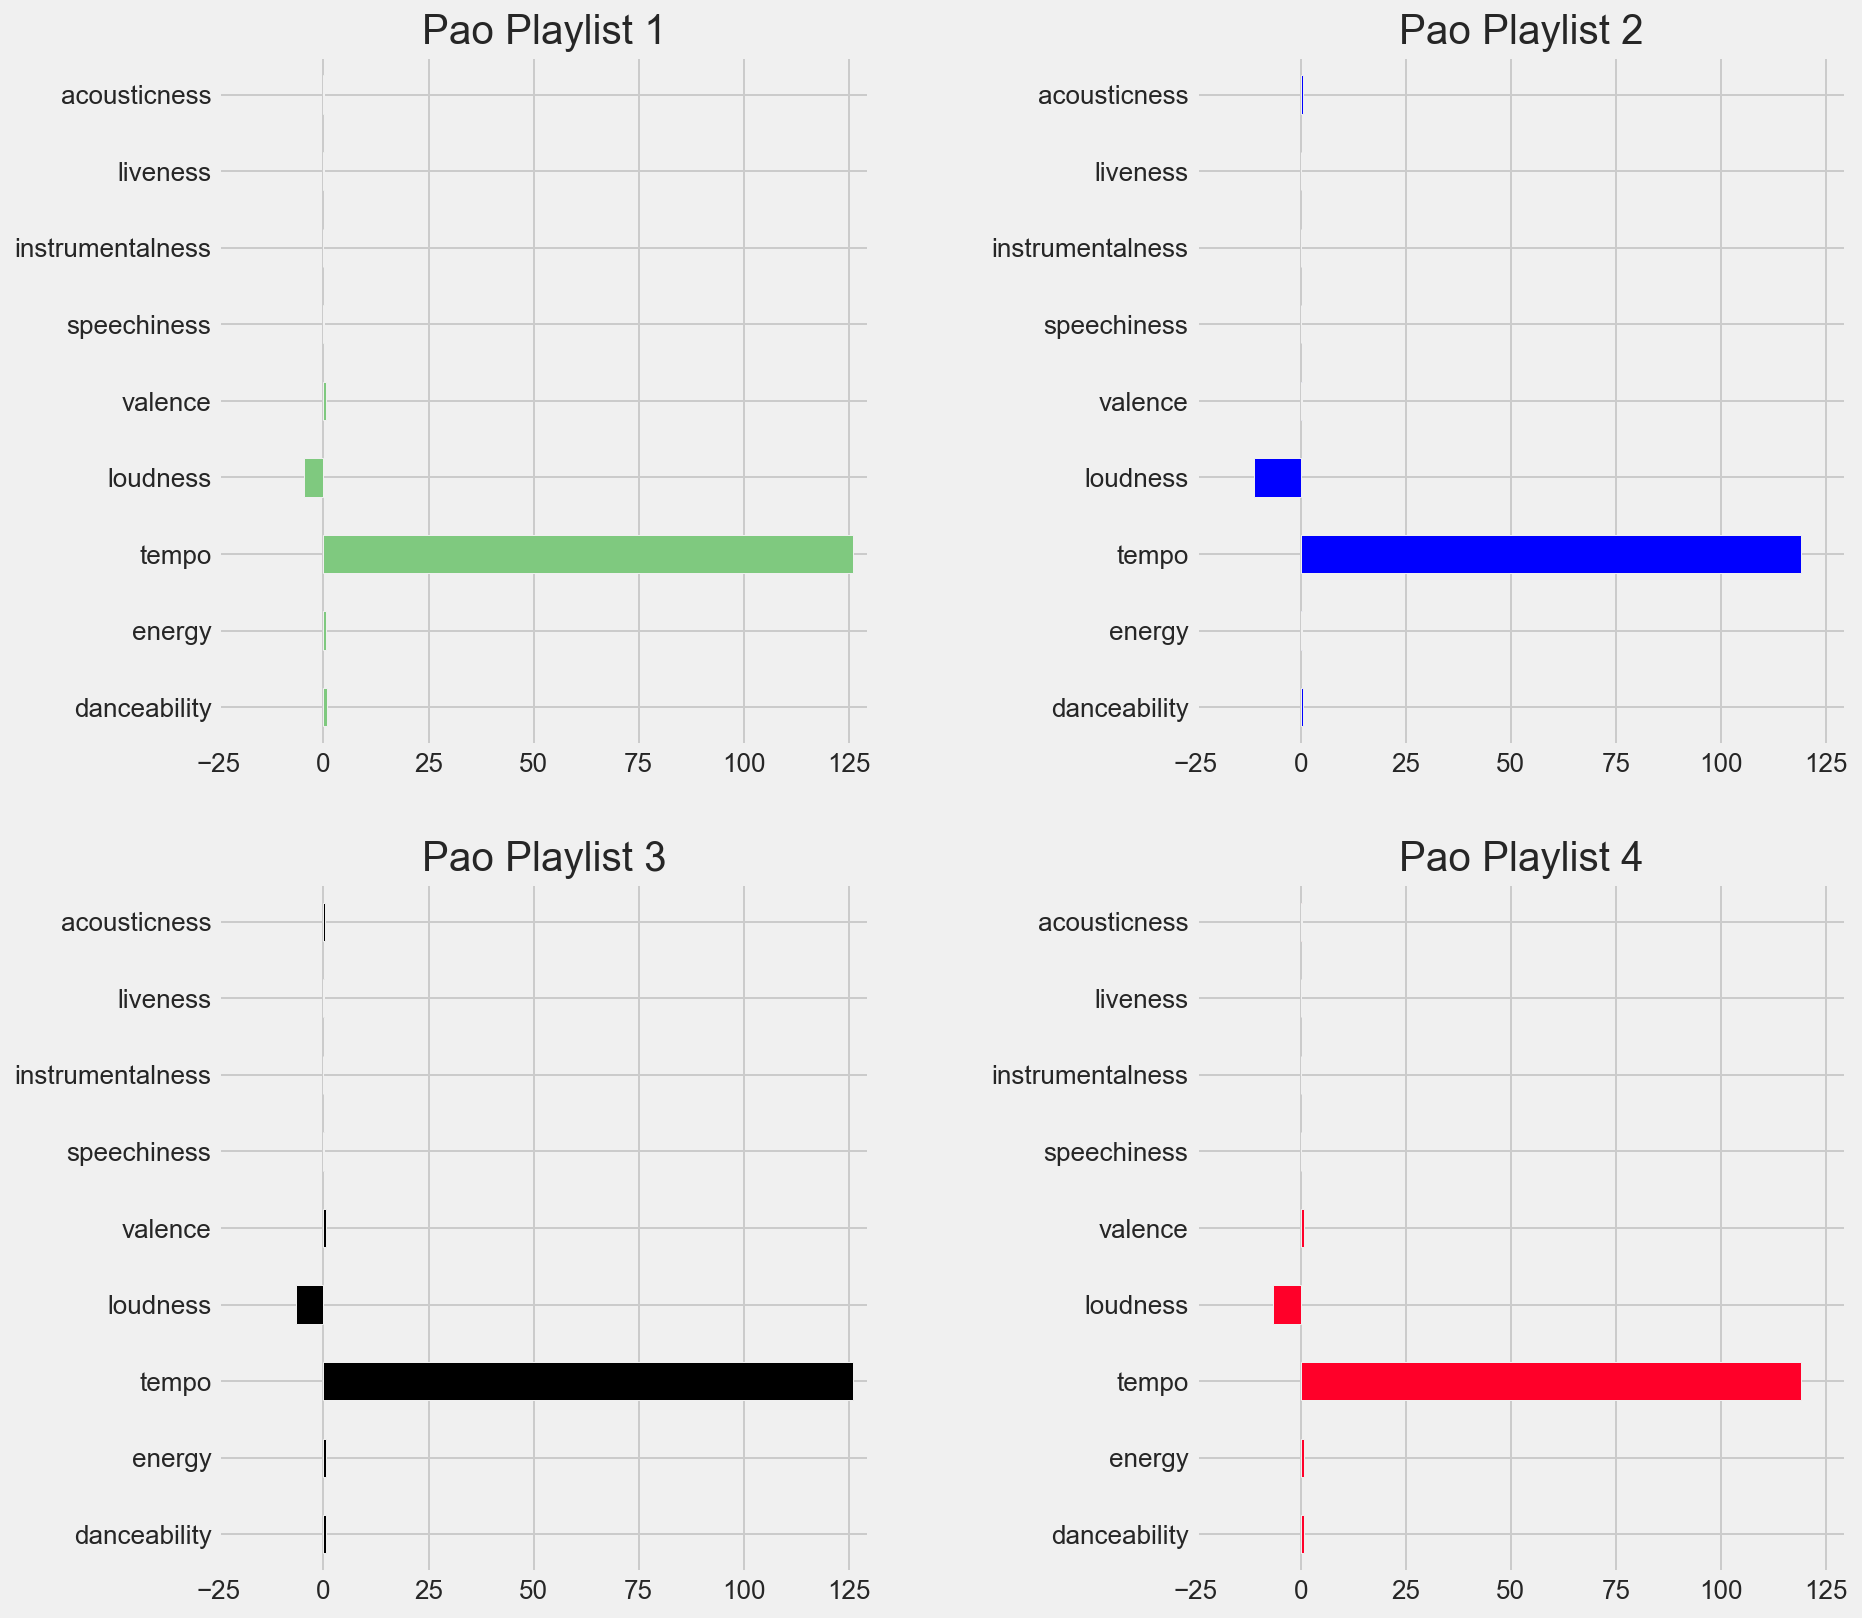

In [55]:
plt.style.use('fivethirtyeight')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 13))
ax1, ax2, ax3, ax4 = axes.flatten()
fig.subplots_adjust(hspace=.2, wspace=.5)

# top left
df_80.mean().plot.barh(ax=ax1, colormap=plt.cm.Accent, fontsize=13)
ax1.set_xlim(-25,130)

# top right
df_cora.mean().plot.barh(ax=ax2, colormap='winter', fontsize=13)
ax2.set_xlim(-25,130)

# bottom left
df_vacia.mean().plot.barh(ax=ax3, colormap='cubehelix', fontsize=13)
ax3.set_xlim(-25,130)

# bottom right
df_Rod.mean().plot.barh(ax=ax4, colormap='gist_rainbow', fontsize=13)
ax4.set_xlim(-25,130)

# Create axis titles
ax1.set_title('Melisa Playlist 1')
ax2.set_title('Pao Playlist 2')
ax3.set_title('Pao Playlist 3')
ax4.set_title('Pao Playlist 4')

plt.show()